# Assignment 2 - k-NN Classification (OPTION B: Python)
- Course: 64060 - Machine Learning and Data Analytics
- Dataset Source: UniversalBank.csvalicised text*

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# File upload
from google.colab import files

# Upload the CSV file
print("Please upload your UniversalBank.csv file:")
uploaded = files.upload()

# Load the data
df = pd.read_csv('UniversalBank.csv')
print("Data loaded successfully!")

Please upload your UniversalBank.csv file:


Saving UniversalBank.csv to UniversalBank.csv
Data loaded successfully!


In [4]:
# Print the first 5 rows in the dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Data Preprocessing
df_clean = df.drop(['ID', 'ZIP Code'], axis=1) # Drop ID/ZIP

# Converting Cat data to dummy
edu_dummies = pd.get_dummies(df_clean['Education'], prefix='Education')
df_clean = pd.concat([df_clean, edu_dummies], axis=1)

# Droping the old eduction from the clean data
df_clean = df_clean.drop('Education', axis=1)
df_clean.head()



,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,True,False,False
1,45,19,34,3,1.5,0,0,1,0,0,0,True,False,False
2,39,15,11,1,1.0,0,0,0,0,0,0,True,False,False
3,35,9,100,1,2.7,0,0,0,0,0,0,False,True,False
4,35,8,45,4,1.0,0,0,0,0,0,1,False,True,False


In [6]:
# Separate features and target
target = df_clean['Personal Loan']
features = df_clean.drop('Personal Loan', axis=1)

# Print the target and features in conjuction
print("Target:")
print(target.head())
print("\nFeatures:")
print(features.head())

Target:
0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

Features:
   Age  Experience  Income  Family  CCAvg  Mortgage  Securities Account  \
0   25           1      49       4    1.6         0                   1   
1   45          19      34       3    1.5         0                   1   
2   39          15      11       1    1.0         0                   0   
3   35           9     100       1    2.7         0                   0   
4   35           8      45       4    1.0         0                   0   

   CD Account  Online  CreditCard  Education_1  Education_2  Education_3  
0           0       0           0         True        False        False  
1           0       0           0         True        False        False  
2           0       0           0         True        False        False  
3           0       0           0        False         True        False  
4           0       0           1        False         True        False  


In [7]:
# Split data: 60% training, 40% validation
features_train, features_val, target_train, target_val = train_test_split(
    features, target, test_size=0.4, random_state=42, stratify=target
)

print(f"Training set size: {features_train.shape[0]}")
print(f"Validation set size: {features_val.shape[0]}")

# Standardize the features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_val_scaled = scaler.transform(features_val)

# Define the test customer
test_customer = pd.DataFrame({
    'Age': [40],
    'Experience': [10],
    'Income': [84],
    'Family': [2],
    'CCAvg': [2],
    'Mortgage': [0],
    'Securities Account': [0],
    'CD Account': [0],
    'Online': [1],
    'CreditCard': [1],
    'Education_1': [0],
    'Education_2': [1],
    'Education_3': [0]
})

# Ensure column order matches
test_customer = test_customer[features.columns]
test_customer_scaled = scaler.transform(test_customer)

# Apply k-NN with k=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(features_train_scaled, target_train)

# Predict for test customer
prediction_k1 = knn_1.predict(test_customer_scaled)

print("Explanation in the next cell!")

Training set size: 3000
Validation set size: 2000
Explanation in the next cell!


In [8]:
# Explain the prediction:
print("=== TASK 1 RESULTS ===")
print(f"Test customer profile:")
print(test_customer.iloc[0])
print(f"\nPrediction with k=1: {prediction_k1[0]}")
print(f"Classification: {'Accept Loan' if prediction_k1[0] == 1 else 'Reject Loan'}")

=== TASK 1 RESULTS ===
Test customer profile:
Age                   40
Experience            10
Income                84
Family                 2
CCAvg                  2
Mortgage               0
Securities Account     0
CD Account             0
Online                 1
CreditCard             1
Education_1            0
Education_2            1
Education_3            0
Name: 0, dtype: int64

Prediction with k=1: 0
Classification: Reject Loan


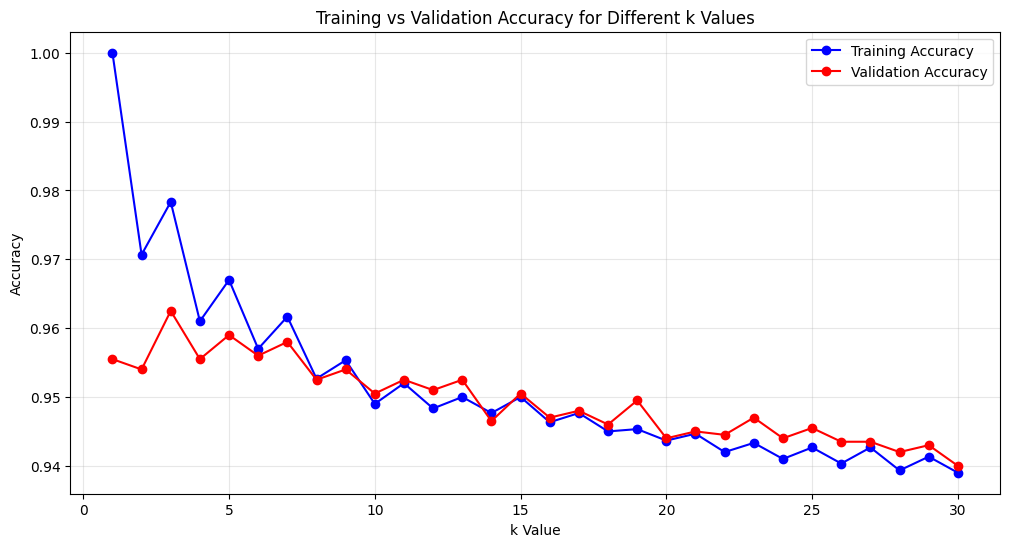

=== TASK 2 RESULTS ===
Best k value: 3 based on the highest accuracy on the validation set
Best validation accuracy: 0.9625
Training accuracy at best k: 0.9783


In [9]:
# Test different k values between 1/30 and find the best
k_values = range(1, 31)
train_accuracies = []
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train_scaled, target_train)

    # Calculate accuracies directly
    train_accuracies.append(knn.score(features_train_scaled, target_train))
    val_accuracies.append(knn.score(features_val_scaled, target_val))

plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, 'o-', label='Training Accuracy', color='blue')
plt.plot(k_values, val_accuracies, 'o-', label='Validation Accuracy', color='red')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different k Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find best k
best_k = k_values[np.argmax(val_accuracies)]
best_val_accuracy = max(val_accuracies)

print("=== TASK 2 RESULTS ===")
print(f"Best k value: {best_k} based on the highest accuracy on the validation set")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")
print(f"Training accuracy at best k: {train_accuracies[best_k-1]:.4f}")

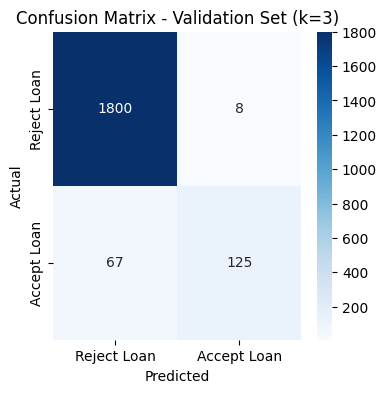

=== TASK 3 RESULTS ===

Detailed Metrics:
Accuracy: 0.9625
Precision: 0.9398
Recall: 0.6510


In [10]:
# Train model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(features_train_scaled, target_train)

# Predictions on validation set
target_val_pred = knn_best.predict(features_val_scaled)

# Confusion Matrix
cm = confusion_matrix(target_val, target_val_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Reject Loan', 'Accept Loan'],
            yticklabels=['Reject Loan', 'Accept Loan'])
plt.title(f'Confusion Matrix - Validation Set (k={best_k})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Detailed results
print("=== TASK 3 RESULTS ===")
tn, fp, fn, tp = cm.ravel()
print(f"\nDetailed Metrics:")
print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.4f}")
print(f"Precision: {tp / (tp + fp):.4f}")
print(f"Recall: {tp / (tp + fn):.4f}")

In [11]:
# Predict with best k
prediction_best_k = knn_best.predict(test_customer_scaled)
prediction_prob_best_k = knn_best.predict_proba(test_customer_scaled)

print("=== TASK 4 RESULTS ===")
print(f"Test customer classification with best k={best_k}:")
print(f"Prediction: {prediction_best_k[0]}")
print(f"Classification: {'Accept Loan' if prediction_best_k[0] == 1 else 'Reject Loan'}")

# Compare with k=1 result
print(f"\nComparison, no difference observed:")
print(f"k=1 prediction: {prediction_k1[0]}")
print(f"k={best_k} prediction: {prediction_best_k[0]}")

=== TASK 4 RESULTS ===
Test customer classification with best k=3:
Prediction: 0
Classification: Reject Loan

Comparison, no difference observed:
k=1 prediction: 0
k=3 prediction: 0


New split sizes:
Training: 2500
Validation: 1500
Test: 1000


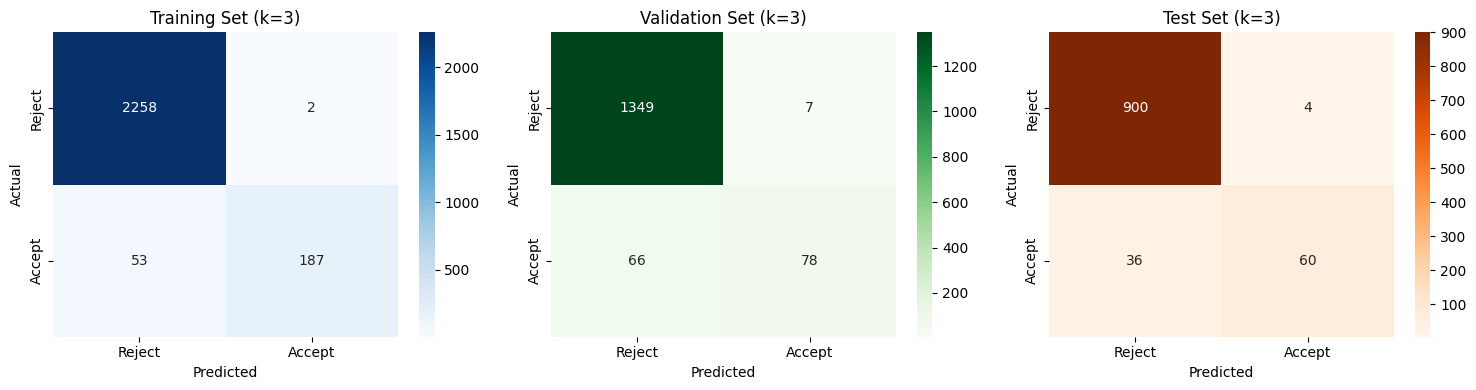

=== TASK 5 RESULTS ===
Training Accuracy: 0.9780
Validation Accuracy: 0.9513
Test Accuracy: 0.9600


In [12]:
# Create 50-30-20 split
features_temp, features_test, target_temp, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)
features_train_new, features_val_new, target_train_new, target_val_new = train_test_split(
    features_temp, target_temp, test_size=0.375, random_state=42, stratify=target_temp
)

print(f"New split sizes:")
print(f"Training: {len(features_train_new)}")
print(f"Validation: {len(features_val_new)}")
print(f"Test: {len(features_test)}")

# Scale the new splits
scaler_new = StandardScaler()
features_train_new_scaled = scaler_new.fit_transform(features_train_new)
features_val_new_scaled = scaler_new.transform(features_val_new)
features_test_scaled = scaler_new.transform(features_test)

# Train model with best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(features_train_new_scaled, target_train_new)

# Predictions for all three sets
target_train_pred = knn_final.predict(features_train_new_scaled)
target_val_pred_new = knn_final.predict(features_val_new_scaled)
target_test_pred = knn_final.predict(features_test_scaled)

# Confusion matrices for all three sets
cm_train = confusion_matrix(target_train_new, target_train_pred)
cm_val = confusion_matrix(target_val_new, target_val_pred_new)
cm_test = confusion_matrix(target_test, target_test_pred)

# Plot all three confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Training set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Reject', 'Accept'], yticklabels=['Reject', 'Accept'])
axes[0].set_title(f'Training Set (k={best_k})')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Validation set
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Reject', 'Accept'], yticklabels=['Reject', 'Accept'])
axes[1].set_title(f'Validation Set (k={best_k})')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

# Test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=['Reject', 'Accept'], yticklabels=['Reject', 'Accept'])
axes[2].set_title(f'Test Set (k={best_k})')
axes[2].set_ylabel('Actual')
axes[2].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Calculate accuracies
train_acc = accuracy_score(target_train_new, target_train_pred)
val_acc = accuracy_score(target_val_new, target_val_pred_new)
test_acc = accuracy_score(target_test, target_test_pred)


# Show accuracy
print("=== TASK 5 RESULTS ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")



In [18]:
# Comments
print("The differnce in the accuracy across the training/validation/test set is \nvery small. To note a small decrease is seen in accuracy on the test \nset which is what we should expect as it is unseen data. \nThe similar performance between the validation and test sets suggests that \nthe choice of k=3 is good and that the model generalizes well to new, unseen customers.")

The differnce in the accuracy across the training/validation/test set is 
very small. To note a small decrease is seen in accuracy on the test 
set which is what we should expect as it is unseen data. 
The similar performance between the validation and test sets suggests that 
the choice of k=3 is good and that the model generalizes well to new, unseen customers.
